## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_paths = [
    "/StrRt0.0001_RD_NDBR6.xlsx",
    "/StrRt0.0001_RD_NDBR20r.xlsx",
    "/StrRt0.0001_RD_NDBR50f.xlsx"
]

## Read and Process Each File

Iterate over a list of file paths, read each Excel file, identify the relevant columns, pair them, and generate plots.


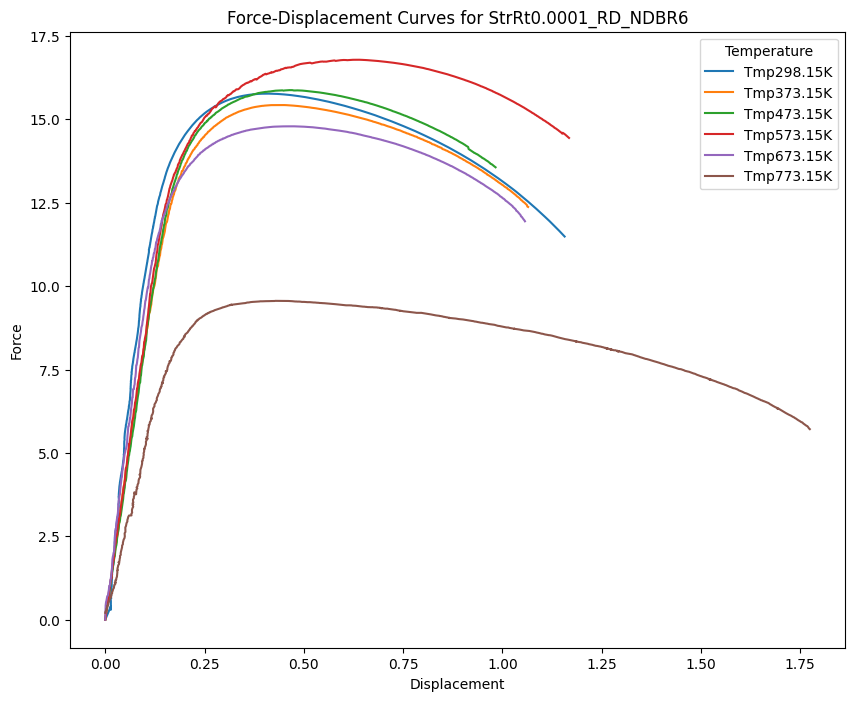

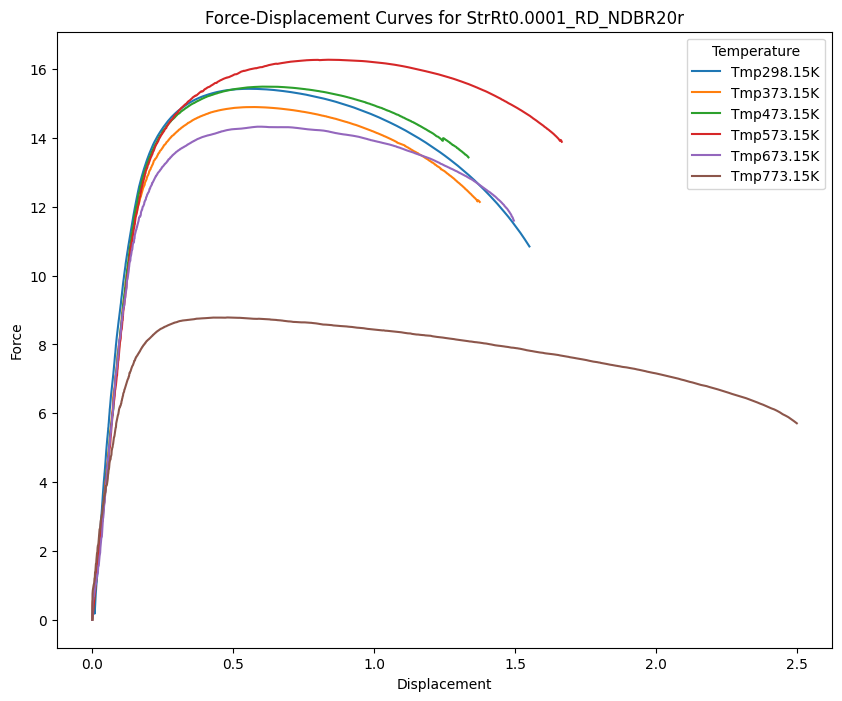

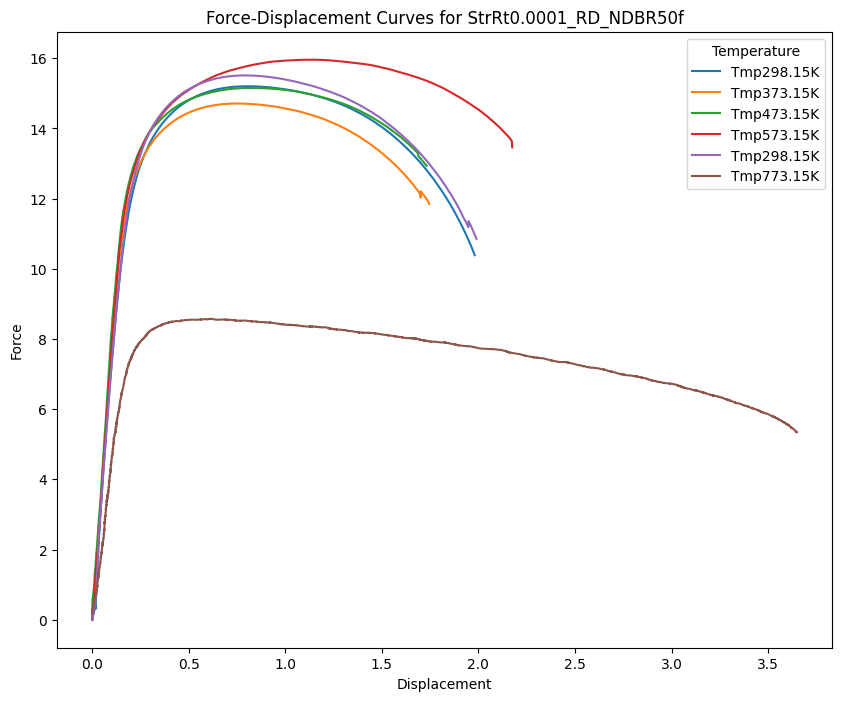

: 

In [3]:
for file_path in file_paths:
    data = pd.read_excel(file_path)
    
    # Identify columns with _F (force) and _D (displacement)
    force_cols = [col for col in data.columns if col.endswith('_F')]
    displacement_cols = [col for col in data.columns if col.endswith('_D')]
    
    # Extract the shape identifier from the filename
    shape = file_path.split("/")[-1].split("_")[-1].split(".")[0]
    
    # Pair up force and displacement columns
    pairs = [(d, f) for d in displacement_cols for f in force_cols if d[:-2] == f[:-2]]
    
    # Generate a single plot for the current file
    plt.figure(figsize=(10, 8))
    for disp_col, force_col in pairs:
        temp_label = disp_col.split('_')[0]  # Extract temperature or unique identifier from column names
        plt.plot(data[disp_col], data[force_col], label=temp_label)
    
    plt.title(f'Force-Displacement Curves for StrRt0.0001_RD_{shape}')
    plt.xlabel('Displacement')
    plt.ylabel('Force')
    plt.legend(title="Temperature")
    plt.show()